# Prueba de conceptos

En este vamos a hacer una pruenba con 2 imagenes (Una por delante y la otra por detras), para demostrar los conceptos que usaremos en la implementacion.

## vamos a importar las imagenes

In [89]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(2479.5), np.float64(3535.5), np.float64(-0.5))

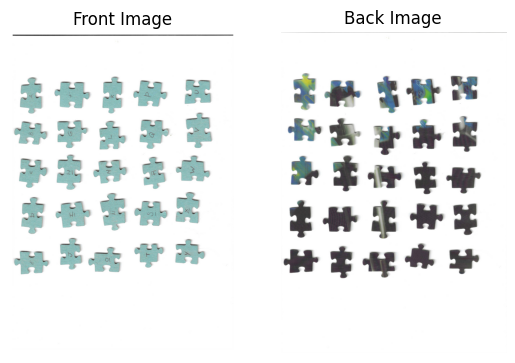

In [90]:
path = 'fotos/scan_25/'

front = cv.imread(path + 'front.jpg')
front = cv.copyMakeBorder(front, 30, 30, 30, 30, cv.BORDER_CONSTANT, value=[255, 255, 255])

back = cv.imread(path + 'back.jpg')

front_gray = cv.cvtColor(front, cv.COLOR_BGR2GRAY)
back_gray = cv.cvtColor(back, cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv.cvtColor(front, cv.COLOR_BGR2RGB))
axes[0].set_title('Front Image')
axes[0].axis('off')
axes[1].imshow(cv.cvtColor(back, cv.COLOR_BGR2RGB))
axes[1].set_title('Back Image')
axes[1].axis('off')

## Segmentacion de las piezas

Como el fondo es banco uniforme, podemos usar un thresshold para segmentar las piezas del fondo.

(np.float64(-0.5), np.float64(2539.5), np.float64(3595.5), np.float64(-0.5))

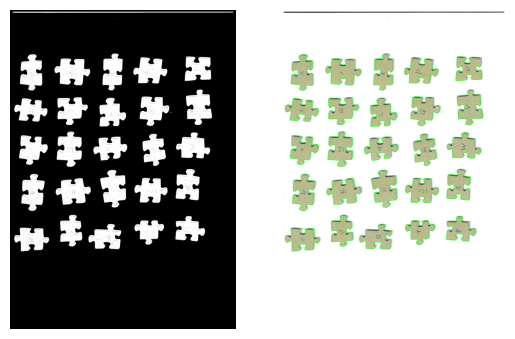

In [91]:
fig, ax = plt.subplots(1, 2)

front_thresh = cv.threshold(front_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]


plt.sca(ax[0])
plt.imshow(front_thresh, cmap='gray')
plt.axis('off')

contornos , _ = cv.findContours(front_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Seleccionamos los 25 contornos mas grandes (las piezas)
contornos = sorted(contornos, key=cv.contourArea, reverse=True)[:25]

front_segmented = front.copy()
contornos_in_original = cv.drawContours(front_segmented, contornos, -1, (0, 255, 0), 3)

plt.sca(ax[1])
plt.imshow(contornos_in_original)
plt.axis('off')

comprobamos que los 25 contornos que hemos encontrado son las piezas que estamos buscando.

A continuacino generamos los ROIS

In [92]:
front_rois = []

for contorno in contornos:

    center = np.mean(contorno, axis=0).astype(int)
    max_x = np.max(contorno[:, 0, 0])
    min_x = np.min(contorno[:, 0, 0])
    max_y = np.max(contorno[:, 0, 1])
    min_y = np.min(contorno[:, 0, 1])

    pad = 20

    roi_front = front[min_y - pad:max_y + pad, min_x - pad:max_x + pad]
    front_rois.append(roi_front)

Comprobamos que los ROIS son correctos

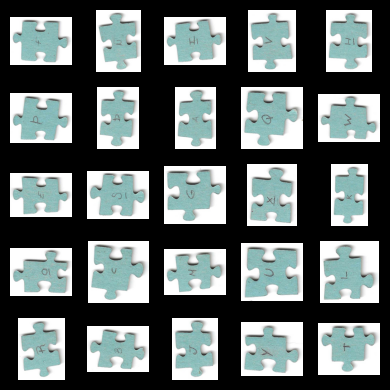

In [93]:
fig, axes = plt.subplots(5, 5, figsize=(4, 4), facecolor='black')

for i, ax in enumerate(axes.flatten()):
    ax.imshow(cv.cvtColor(front_rois[i], cv.COLOR_BGR2RGB))
    ax.axis('off')
    
plt.tight_layout()
plt.show()

Una vez comprobado que los rois son correctos vamos a guardarlos enumerados en una carpeta.

In [95]:
for i, roi in enumerate(front_rois):
    cv.imwrite(f'fotos/segmented_scan_25/{i:02d}.png', roi)